In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt


In [3]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
X

array([[-0.71239066],
       [-0.43714566],
       [-0.45375238],
       [ 0.95283061],
       [ 0.23785784],
       [ 0.86121137],
       [-0.24332625],
       [ 0.18494595],
       [-0.72099967],
       [-0.42989708],
       [ 2.01522083],
       [ 0.39724133],
       [ 0.20780005],
       [-0.23242587],
       [-0.76862702],
       [ 0.45315861],
       [ 0.63988397],
       [ 0.3595323 ],
       [-1.61510796],
       [ 1.74924179],
       [-0.78898902],
       [-0.51196509],
       [-0.92833523],
       [ 2.15038297],
       [-0.2073497 ],
       [-1.63909341],
       [-0.33861825],
       [-0.32212366],
       [-0.48137142],
       [-0.52316421],
       [ 0.72196506],
       [ 0.76591105],
       [ 0.45348104],
       [-1.26160595],
       [-2.18711527],
       [-1.18541881],
       [ 0.21745166],
       [ 1.33031692],
       [-1.08718159],
       [ 0.56226171],
       [-1.51284512],
       [-0.00238903],
       [-0.27813452],
       [ 0.45181234],
       [ 1.19070527],
       [ 0

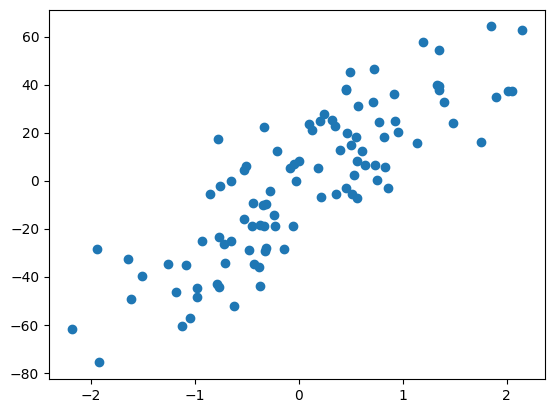

In [4]:
plt.scatter(X,y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# lr.fit(X,y)
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [25]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [22]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

np.float64(0.6375011587464419)

In [23]:
class Gradient_Decent:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        # Calculate the b using GD
        for i in range(self.epochs):
            loss_slop_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slop_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())

            self.b=self.b-(self.lr*loss_slop_b)
            self.m=self.m-(self.lr*loss_slop_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m*X+self.b

In [26]:
gd=Gradient_Decent(0.001,50)

gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [27]:
y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

In [16]:
gd.predict(X)

array([[-22.13004587],
       [-14.46803398],
       [-14.93031641],
       [ 24.22481941],
       [  4.3220791 ],
       [ 21.67440917],
       [ -9.07267152],
       [  2.84916767],
       [-22.36969544],
       [-14.266255  ],
       [ 53.79864004],
       [  8.75884689],
       [  3.48535872],
       [ -8.76923699],
       [-23.69550079],
       [ 10.31541979],
       [ 15.51330493],
       [  7.70913832],
       [-47.25904197],
       [ 46.39456556],
       [-24.26231913],
       [-16.55078722],
       [-28.14130775],
       [ 57.56115677],
       [ -8.07119002],
       [-47.92672634],
       [-11.72532075],
       [-11.26615965],
       [-15.69914914],
       [-16.86253782],
       [ 17.79820103],
       [ 19.02152826],
       [ 10.32439521],
       [-37.41858492],
       [-63.18204405],
       [-35.29775901],
       [  3.75403106],
       [ 34.73292872],
       [-32.56312362],
       [ 13.35252918],
       [-44.41234489],
       [ -2.36568738],
       [-10.04163129],
       [ 10

NameError: name 'm' is not defined

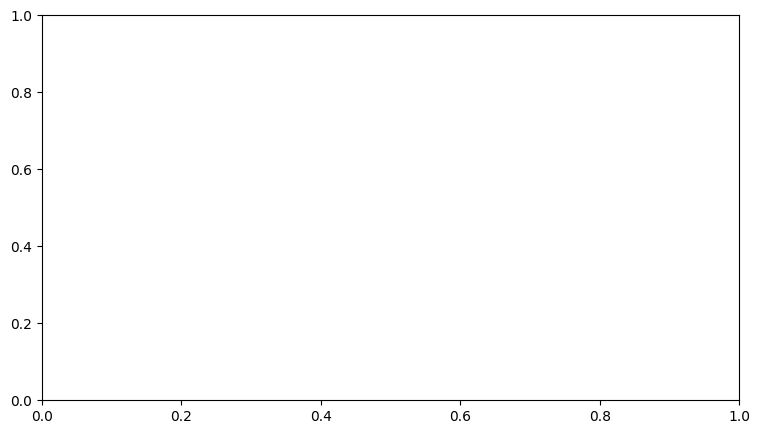

In [28]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)